In [4]:
!pip install geopandas

     |████████████████████████████████| 994 kB 640 kB/s eta 0:00:01
  Using cached Fiona-1.8.20-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (15.4 MB)
  Using cached pyproj-3.1.0-cp38-cp38-manylinux2010_x86_64.whl (6.6 MB)
  Using cached munch-2.5.0-py2.py3-none-any.whl (10 kB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
  Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)


In [6]:
import geopandas
import pandas as pd


# Read data

In [146]:
df=pd.read_csv('../raw_data/bpe_t2_clean.csv')
df.drop(columns='Unnamed: 0',inplace=True)
df.head(2)

,iris_id,iris_type,iris_with_t1,iris_with_t2,AN,longitude,latitude,"('LAB', 'is_sport')","('LAB', 'is_leasure')","('LAB', 'is_medical')",...,"('LAB', 'is_commerce_spec')","('LAB', 'is_grande_surface')","('LAB', 'is_high_educ')","('LAB', 'is_schools')","('LAB', 'is_transport')",Q_XY_acceptable,Q_XY_bonne,Q_XY_mauvaise,LAB,CLASSE
0,61230102,H,0,1,2018,7.178602,43.658636,0,1,0,...,0,0,0,0,0,0.0,1.0,0.0,Électricien,Services a
1,61230102,H,0,1,2018,7.178602,43.658636,0,0,1,...,0,0,0,0,0,0.0,1.0,0.0,Agence immobilière,Services a


In [155]:
df.loc[1,'longitude']

7.178601702949741

In [156]:
points =[]
for i in range(len(df)):
    t=(df.loc[i,'longitude'],df.loc[i,'latitude'])
    points.append(t)
points


[(7.178601702949741, 43.6586357455608),
 (7.178601702949741, 43.6586357455608),
 (7.178601702949741, 43.6586357455608),
 (7.178601702949741, 43.6586357455608),
 (7.283690599762412, 43.70687549635005),
 (7.28342218656656, 43.70640296096799),
 (7.284589651709618, 43.7047142534787),
 (7.282929274811655, 43.7069108914852),
 (7.285406994042546, 43.70429599051787),
 (7.281650093702964, 43.70480661023544),
 (7.281581002381486, 43.70469668675842),
 (7.285859894738779, 43.704425389094574),
 (7.284169356421879, 43.70626818179145),
 (7.284427216262065, 43.70607869265241),
 (7.283682772634782, 43.70630627527803),
 (7.283198475150889, 43.704067964027125),
 (7.281581002381486, 43.70469668675842),
 (7.283668949075528, 43.70474421969362),
 (7.284150502210155, 43.70739356549032),
 (7.284150502210155, 43.70739356549032),
 (7.284458363164074, 43.70452027161778),
 (7.284458363164074, 43.70452027161778),
 (7.2844183509150335, 43.704019004672),
 (7.282424191973535, 43.705440276258166),
 (7.284473585083287, 

In [157]:
df['points']=points

In [158]:
df.head(3)

,iris_id,iris_type,iris_with_t1,iris_with_t2,AN,longitude,latitude,"('LAB', 'is_sport')","('LAB', 'is_leasure')","('LAB', 'is_medical')",...,"('LAB', 'is_grande_surface')","('LAB', 'is_high_educ')","('LAB', 'is_schools')","('LAB', 'is_transport')",Q_XY_acceptable,Q_XY_bonne,Q_XY_mauvaise,LAB,CLASSE,points
0,61230102,H,0,1,2018,7.178602,43.658636,0,1,0,...,0,0,0,0,0.0,1.0,0.0,Électricien,Services a,"(7.178601702949741, 43.6586357455608)"
1,61230102,H,0,1,2018,7.178602,43.658636,0,0,1,...,0,0,0,0,0.0,1.0,0.0,Agence immobilière,Services a,"(7.178601702949741, 43.6586357455608)"
2,61230102,H,0,1,2018,7.178602,43.658636,0,0,0,...,0,0,0,0,0.0,1.0,0.0,Taxi,Transport,"(7.178601702949741, 43.6586357455608)"


In [132]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   iris_id   5 non-null      object
 1   geometry  5 non-null      object
dtypes: object(2)
memory usage: 208.0+ bytes


In [25]:
df['iris_id']=df.iris_id.map(lambda x: str(0)+str(x))

In [38]:
df.iris_id[5]

'060880301'

In [134]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   iris_id   5 non-null      object
 1   geometry  5 non-null      object
dtypes: object(2)
memory usage: 208.0+ bytes


In [130]:
iris_list=list(pd.unique(df.iris_id))

# GeoPandas

In [127]:
zipfile = "../raw_data/iris_geo/iris-geo-2018-frtot.zip"
gdf = geopandas.read_file(zipfile)

In [128]:
gdf

,INSEE_COM,NOM_COM,IRIS,CODE_IRIS,NOM_IRIS,TYP_IRIS,geometry
0,72191,Mayet,0000,721910000,Mayet,Z,"POLYGON ((0.30241 47.79701, 0.30303 47.79657, ..."
1,77248,Lesches,0000,772480000,Lesches,Z,"POLYGON ((2.80560 48.91735, 2.80567 48.91716, ..."
2,51426,Péas,0000,514260000,Péas,Z,"POLYGON ((3.80329 48.74375, 3.79938 48.74429, ..."
3,81199,Padiès,0000,811990000,Padiès,Z,"POLYGON ((2.39472 44.03456, 2.39463 44.03457, ..."
4,59225,Feignies,0102,592250102,Sud,H,"POLYGON ((3.94854 50.29482, 3.94817 50.29468, ..."
...,...,...,...,...,...,...,...
49759,97611,Mamoudzou,0206,976110206,Mtsapéré-Doujani-Carrière,H,"POLYGON ((45.19928 -12.78985, 45.19934 -12.789..."
49760,97602,Bandraboua,0100,976020100,Bandraboua,H,"POLYGON ((45.09764 -12.71079, 45.09352 -12.701..."
49761,97610,Koungou,0600,976100600,Majicavo-Lamir,H,"POLYGON ((45.22846 -12.74984, 45.22845 -12.749..."
49762,97616,Sada,0102,976160102,Mandrajou-Gendarmerie,H,"POLYGON ((45.11086 -12.84876, 45.10879 -12.848..."


In [135]:
gdf['area']=gdf.area

<ipython-input-135-81175f56eb64>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['area']=gdf.area


In [136]:
gdf

,INSEE_COM,NOM_COM,IRIS,CODE_IRIS,NOM_IRIS,TYP_IRIS,geometry,area
0,72191,Mayet,0000,721910000,Mayet,Z,"POLYGON ((0.30241 47.79701, 0.30303 47.79657, ...",0.006510
1,77248,Lesches,0000,772480000,Lesches,Z,"POLYGON ((2.80560 48.91735, 2.80567 48.91716, ...",0.000501
2,51426,Péas,0000,514260000,Péas,Z,"POLYGON ((3.80329 48.74375, 3.79938 48.74429, ...",0.000944
3,81199,Padiès,0000,811990000,Padiès,Z,"POLYGON ((2.39472 44.03456, 2.39463 44.03457, ...",0.001654
4,59225,Feignies,0102,592250102,Sud,H,"POLYGON ((3.94854 50.29482, 3.94817 50.29468, ...",0.001391
...,...,...,...,...,...,...,...,...
49759,97611,Mamoudzou,0206,976110206,Mtsapéré-Doujani-Carrière,H,"POLYGON ((45.19928 -12.78985, 45.19934 -12.789...",0.000068
49760,97602,Bandraboua,0100,976020100,Bandraboua,H,"POLYGON ((45.09764 -12.71079, 45.09352 -12.701...",0.000375
49761,97610,Koungou,0600,976100600,Majicavo-Lamir,H,"POLYGON ((45.22846 -12.74984, 45.22845 -12.749...",0.000069
49762,97616,Sada,0102,976160102,Mandrajou-Gendarmerie,H,"POLYGON ((45.11086 -12.84876, 45.10879 -12.848...",0.000027


In [137]:
gdf['centroid'] = gdf.centroid

<ipython-input-137-154b4f6ac867>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf.centroid


In [138]:
gdf

,INSEE_COM,NOM_COM,IRIS,CODE_IRIS,NOM_IRIS,TYP_IRIS,geometry,area,centroid
0,72191,Mayet,0000,721910000,Mayet,Z,"POLYGON ((0.30241 47.79701, 0.30303 47.79657, ...",0.006510,POINT (0.27970 47.76450)
1,77248,Lesches,0000,772480000,Lesches,Z,"POLYGON ((2.80560 48.91735, 2.80567 48.91716, ...",0.000501,POINT (2.79287 48.91534)
2,51426,Péas,0000,514260000,Péas,Z,"POLYGON ((3.80329 48.74375, 3.79938 48.74429, ...",0.000944,POINT (3.77902 48.73613)
3,81199,Padiès,0000,811990000,Padiès,Z,"POLYGON ((2.39472 44.03456, 2.39463 44.03457, ...",0.001654,POINT (2.36513 44.04499)
4,59225,Feignies,0102,592250102,Sud,H,"POLYGON ((3.94854 50.29482, 3.94817 50.29468, ...",0.001391,POINT (3.90801 50.28617)
...,...,...,...,...,...,...,...,...,...
49759,97611,Mamoudzou,0206,976110206,Mtsapéré-Doujani-Carrière,H,"POLYGON ((45.19928 -12.78985, 45.19934 -12.789...",0.000068,POINT (45.20779 -12.79356)
49760,97602,Bandraboua,0100,976020100,Bandraboua,H,"POLYGON ((45.09764 -12.71079, 45.09352 -12.701...",0.000375,POINT (45.11225 -12.70476)
49761,97610,Koungou,0600,976100600,Majicavo-Lamir,H,"POLYGON ((45.22846 -12.74984, 45.22845 -12.749...",0.000069,POINT (45.22521 -12.75464)
49762,97616,Sada,0102,976160102,Mandrajou-Gendarmerie,H,"POLYGON ((45.11086 -12.84876, 45.10879 -12.848...",0.000027,POINT (45.10795 -12.84623)


<AxesSubplot:>

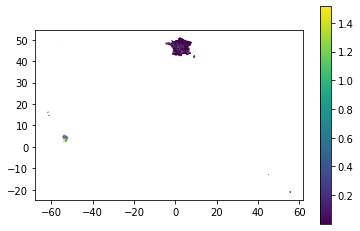

In [139]:
gdf.plot("area", legend=True)
gdf.plot

<AxesSubplot:>

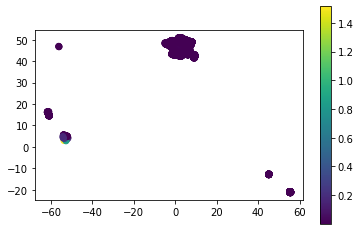

In [140]:
gdf = gdf.set_geometry("centroid")
gdf.plot("area", legend=True)

In [162]:
bbox=(df.longitude.min(),df.latitude.min(),df.longitude.max(),df.latitude.max())
bbox

(7.178601702949741, 43.65663996447852, 7.306999525425804, 43.71684382296645)

In [161]:
df.describe()

,iris_id,iris_with_t1,iris_with_t2,AN,longitude,latitude,"('LAB', 'is_sport')","('LAB', 'is_leasure')","('LAB', 'is_medical')","('LAB', 'is_socio_med')",...,"('LAB', 'is_general_service')","('LAB', 'is_commerce')","('LAB', 'is_commerce_spec')","('LAB', 'is_grande_surface')","('LAB', 'is_high_educ')","('LAB', 'is_schools')","('LAB', 'is_transport')",Q_XY_acceptable,Q_XY_bonne,Q_XY_mauvaise
count,1.141900e+04,11419.000000,11419.000000,11419.0,11419.000000,11419.000000,11419.000000,11419.000000,11419.000000,11419.000000,...,11419.000000,11419.000000,11419.000000,11419.000000,11419.000000,11419.000000,11419.000000,11419.000000,11419.000000,11419.000000
mean,6.090262e+07,0.292670,0.993782,2018.0,7.256572,43.694255,0.007969,0.001839,0.251686,0.006218,...,0.008144,0.144846,0.434539,0.053858,0.003240,0.020405,0.042561,0.008407,0.977494,0.014099
std,8.260867e+04,0.455008,0.078610,0.0,0.027115,0.011991,0.088918,0.042846,0.434001,0.078610,...,0.089882,0.351961,0.495718,0.225746,0.056833,0.141386,0.201873,0.091308,0.148330,0.117906
min,6.088010e+07,0.000000,0.000000,2018.0,7.178602,43.656640,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.088160e+07,0.000000,1.000000,2018.0,7.242640,43.693491,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,6.088220e+07,0.000000,1.000000,2018.0,7.265396,43.698567,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,6.088250e+07,1.000000,1.000000,2018.0,7.274890,43.701802,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,6.123011e+07,1.000000,1.000000,2018.0,7.307000,43.716844,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [167]:
df.columns

Index(['iris_id', 'iris_type', 'iris_with_t1', 'iris_with_t2', 'AN',
       'longitude', 'latitude', '('LAB', 'is_sport')', '('LAB', 'is_leasure')',
       '('LAB', 'is_medical')', '('LAB', 'is_socio_med')',
       '('LAB', 'is_tourist')', '('LAB', 'is_general_service')',
       '('LAB', 'is_commerce')', '('LAB', 'is_commerce_spec')',
       '('LAB', 'is_grande_surface')', '('LAB', 'is_high_educ')',
       '('LAB', 'is_schools')', '('LAB', 'is_transport')', 'Q_XY_acceptable',
       'Q_XY_bonne', 'Q_XY_mauvaise', 'LAB', 'CLASSE', 'points'],
      dtype='object')

In [163]:
gdf_metro=geopandas.read_file(zipfile,bbox=bbox)

In [164]:
gdf

,INSEE_COM,NOM_COM,IRIS,CODE_IRIS,NOM_IRIS,TYP_IRIS,geometry,area,centroid
0,72191,Mayet,0000,721910000,Mayet,Z,"POLYGON ((0.30241 47.79701, 0.30303 47.79657, ...",0.006510,POINT (0.27970 47.76450)
1,77248,Lesches,0000,772480000,Lesches,Z,"POLYGON ((2.80560 48.91735, 2.80567 48.91716, ...",0.000501,POINT (2.79287 48.91534)
2,51426,Péas,0000,514260000,Péas,Z,"POLYGON ((3.80329 48.74375, 3.79938 48.74429, ...",0.000944,POINT (3.77902 48.73613)
3,81199,Padiès,0000,811990000,Padiès,Z,"POLYGON ((2.39472 44.03456, 2.39463 44.03457, ...",0.001654,POINT (2.36513 44.04499)
4,59225,Feignies,0102,592250102,Sud,H,"POLYGON ((3.94854 50.29482, 3.94817 50.29468, ...",0.001391,POINT (3.90801 50.28617)
...,...,...,...,...,...,...,...,...,...
49759,97611,Mamoudzou,0206,976110206,Mtsapéré-Doujani-Carrière,H,"POLYGON ((45.19928 -12.78985, 45.19934 -12.789...",0.000068,POINT (45.20779 -12.79356)
49760,97602,Bandraboua,0100,976020100,Bandraboua,H,"POLYGON ((45.09764 -12.71079, 45.09352 -12.701...",0.000375,POINT (45.11225 -12.70476)
49761,97610,Koungou,0600,976100600,Majicavo-Lamir,H,"POLYGON ((45.22846 -12.74984, 45.22845 -12.749...",0.000069,POINT (45.22521 -12.75464)
49762,97616,Sada,0102,976160102,Mandrajou-Gendarmerie,H,"POLYGON ((45.11086 -12.84876, 45.10879 -12.848...",0.000027,POINT (45.10795 -12.84623)


In [169]:
!pip install geojson

In [176]:
df_new=df[['latitude','longitude','iris_id','iris_type']]
df_new.head(2)

,latitude,longitude,iris_id,iris_type
0,43.658636,7.178602,61230102,H
1,43.658636,7.178602,61230102,H


In [177]:
df_new.to_csv('../raw_data/new.csv')

In [182]:
import csv, json
from geojson import Feature, FeatureCollection, Point

features = []
with open('../raw_data/new.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for latitude, longitude, weather, temp in reader:
        latitude, longitude = map(float, (latitude, longitude))
        features.append(
            Feature(
                geometry = Point((longitude, latitude)),
                properties = {
                    'iris_id': weather,
                    'iris_type': temp
                }
            )
        )

collection = FeatureCollection(features)
with open("GeoObs.json", "w") as f:
    f.write('%s' % collection)

In [186]:
features[0]

{"geometry": {"coordinates": [7.178602, 43.658636], "type": "Point"}, "properties": {"iris_id": "61230102", "iris_type": "H"}, "type": "Feature"}

In [190]:
import csv
import json
from collections import OrderedDict

li = []
with open('../raw_data/new.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for latitude, longitude, iris_id, iris_type in reader:
        d = OrderedDict()
        d['type'] = 'Feature'
        d['geometry'] = {
            'type': 'Point',
            'coordinates': [float(latitude), float(longitude)]
        }
        d['properties'] = {
            'iris_id': iris_id,
            'iris_type': iris_type
        }
        li.append(d)

d = OrderedDict()
d['type'] = 'FeatureCollection'
d['features'] = li
with open('GeoObs.json', 'w') as f:
    f.write(json.dumps(d, sort_keys=False, indent=4))

In [191]:
li

[OrderedDict([('type', 'Feature'),
              ('geometry',
               {'type': 'Point', 'coordinates': [43.65863575, 7.178601703]}),
              ('properties', {'iris_id': '61230102', 'iris_type': 'H'})]),
 OrderedDict([('type', 'Feature'),
              ('geometry',
               {'type': 'Point', 'coordinates': [43.65863575, 7.178601703]}),
              ('properties', {'iris_id': '61230102', 'iris_type': 'H'})]),
 OrderedDict([('type', 'Feature'),
              ('geometry',
               {'type': 'Point', 'coordinates': [43.65863575, 7.178601703]}),
              ('properties', {'iris_id': '61230102', 'iris_type': 'H'})]),
 OrderedDict([('type', 'Feature'),
              ('geometry',
               {'type': 'Point', 'coordinates': [43.65863575, 7.178601703]}),
              ('properties', {'iris_id': '61230102', 'iris_type': 'H'})]),
 OrderedDict([('type', 'Feature'),
              ('geometry',
               {'type': 'Point', 'coordinates': [43.7068755, 7.2836906]}),
   

## join Datasets

In [199]:
t2df=pd.read_csv('../raw_data/bpe_t2_agg_iris_clean.csv')

In [200]:
t2df

,Unnamed: 0,LAB,LAB.1,LAB.2,LAB.3,LAB.4,LAB.5,LAB.6,LAB.7,LAB.8,LAB.9,LAB.10,LAB.11,iris_with_t1,iris_with_t2
0,NaN,count_sport,count_leasure,count_medical,count_socio_med,count_tourist,count_general_service,count_commerce,count_commerce_spec,count_grande_surface,count_high_educ,count_schools,count_transport,NaN,NaN
1,iris_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,060880101,0,1,27,1,7,2,35,190,6,2,4,1,0.0,1.0
3,060880102,0,1,17,0,2,0,40,226,2,0,0,1,1.0,1.0
4,060880103,6,0,17,1,3,0,37,115,3,0,2,2,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,061230107,0,0,41,0,3,3,40,71,13,0,6,4,0.0,1.0
98,061230108,2,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0
99,061230109,1,0,0,0,0,0,1,1,0,0,1,0,0.0,0.0
100,061230110,3,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0


In [197]:
t2df.drop(columns='Unnamed: 0',inplace=True)


In [202]:
t2df.head(4)

,Unnamed: 0,LAB,LAB.1,LAB.2,LAB.3,LAB.4,LAB.5,LAB.6,LAB.7,LAB.8,LAB.9,LAB.10,LAB.11,iris_with_t1,iris_with_t2
0,NaN,count_sport,count_leasure,count_medical,count_socio_med,count_tourist,count_general_service,count_commerce,count_commerce_spec,count_grande_surface,count_high_educ,count_schools,count_transport,NaN,NaN
1,iris_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,060880101,0,1,27,1,7,2,35,190,6,2,4,1,0.0,1.0
3,060880102,0,1,17,0,2,0,40,226,2,0,0,1,1.0,1.0


In [201]:
t2df.merge(gdf,how='inner',left_on='iris_id',right_on='CODE_IRIS')
join_df=agg_t2.merge(gdf,how='inner',left_on='iris_id',right_on='CODE_IRIS')

KeyError: 'iris_id'

In [ ]:
gdf.plot("area", legend=True)
gdf.plot